# Sprawozdanie z laboratorium fizycznego 

## Ćwiczenie nr E13

Badanie elektrycznego obwodu rezonansowego RLC

### Cel ćwiczenia

Celem ćwiczenia jest zbadanie zjawiska rezonansu napięć w szeregowym obwodzie RLC,  
wyznaczenie dobroci obwodu oraz wartości indukcyjności i rezystancji jego elementów.

### Opis badanego zjawiska

Obwód rezonansowy RLC składa się z rezystora (R), cewki (L) i kondensatora (C) i charakteryzuje się zdolnością  
do reagowania na określoną częstotliwość prądu zmiennego.

### Wzory i zależności

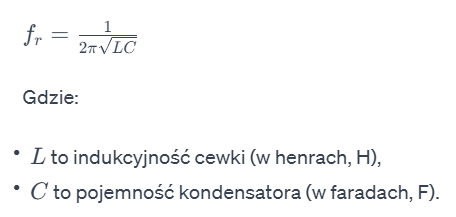

### Schemat układu pomiarowego

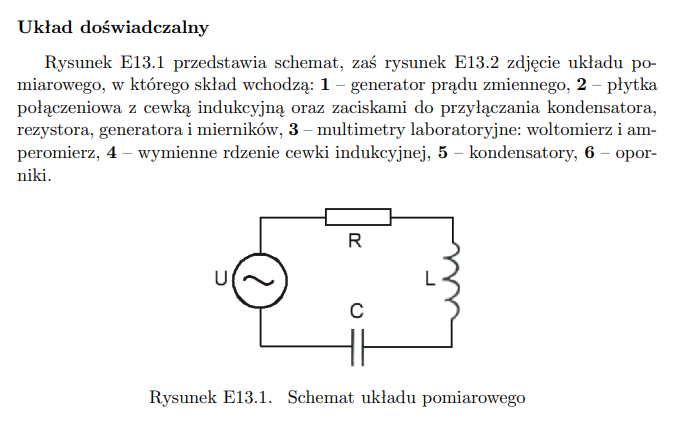

In [18]:
# Zaimportowanie potrzebnych modułów
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Potrzebne stałe
PI = 3.14159

# Ścieżki do katalogu z danymi
PATH = 'data'


# Funcja zwaracjąca ramkę DataFrame w zależności od podanego pliku CSV
def get_data_frame(filename: str) -> pd.DataFrame:

    # Załadowanie danych z pliku CSV
    csv_data = pd.read_csv(f'{PATH}/{filename}', sep=';')
    
    # Stowrzenie ramki danych 
    csv_df = pd.DataFrame(csv_data)

    # Zwrócenie gotowej ramki
    return csv_df


# Funkcja obliczająca częstość kołową ramki
def calculate_omega(df: pd.DataFrame) -> None:
    df['o'] = df['f'] * 2 * PI


# Funkcja wyświetlająca wykres o zadanym tytule z zadanej ramki
def plot_from_df(
    *, 
    title: str, 
    df: pd.DataFrame, 
    x_name: str, 
    y_name: str, 
    x_label: str, 
    y_label: str
) -> None:

    # Wybranie potrzebnej kolumny
    plt.plot(df[x_name], df[y_name], linestyle='', marker='o')

    # Ustawienie etykiet osi
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Wyświetl wykres
    plt.show()


# Funkcja wyświetlająca dane z trzech ramek pomiarów na jednym wykresie
def plot_from_multiple_dfs(
    *,
    title: str,
    dfs: (pd.DataFrame),
    x_name: str,
    y_name: str,
    x_label: str, 
    y_label: str
) -> None:

    for i, df in enumerate(dfs):
        plt.plot(df[x_name], df[y_name], label=f'pomiar {i + 1}', linestyle='', marker='o')
    
    # Adding labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the legend
    plt.legend()
    
    # Show plot
    plt.grid(True)
    plt.show()


## Ćwiczenie E13.1

---

### Pobranie danych do ramek

In [19]:
# Układ bez rdzenia cewki
mesurement_none = get_data_frame('data1.csv')

# Układ z rdzeniem miedzienym
mesurement_copper = get_data_frame('data2.csv')

# Układ z rdzeniem ze stali listkowanej
mesurement_steel = get_data_frame('data3.csv')

### Obliczenie częstości kołowej

In [20]:
# Układ bez rdzenia cewki
calculate_omega(mesurement_none)

# Układ z rdzeniem miedzienym
calculate_omega(mesurement_copper)

# Układ z rdzeniem ze stali listkowanej
calculate_omega(mesurement_steel)

### Wyrysowanie wykresów z obliczonych danych

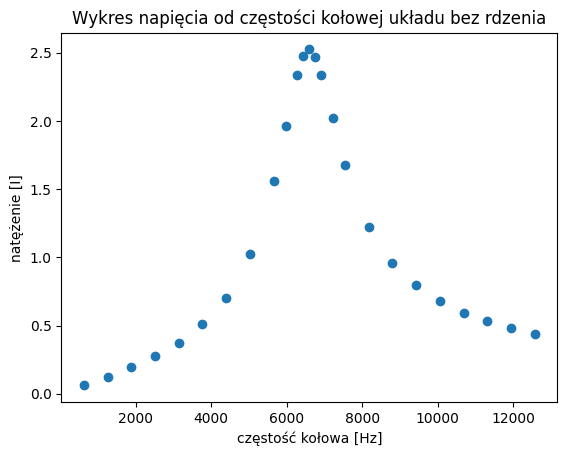

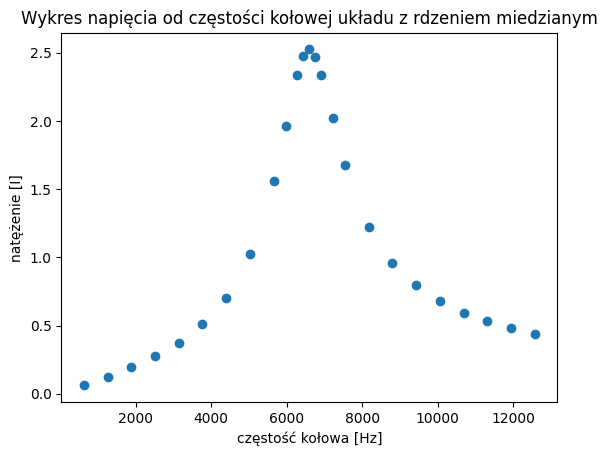

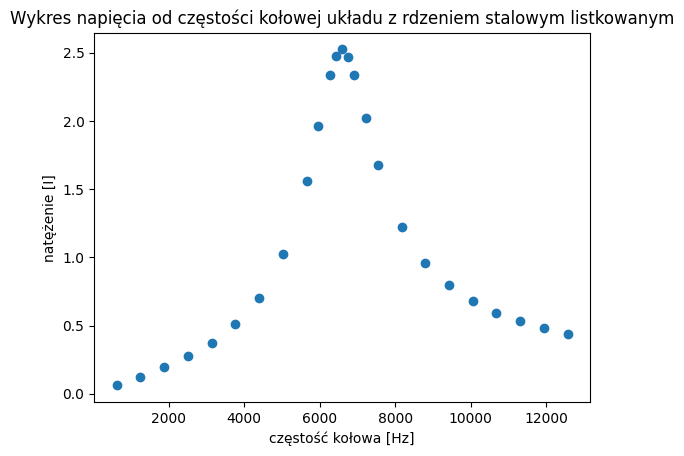

In [21]:
# Układ bez rdzenia cewki
plot_from_df(
    title='Wykres napięcia od częstości kołowej układu bez rdzenia', 
    df=mesurement_none, 
    x_name='o', 
    y_name='i', 
    x_label='częstość kołowa [Hz]', 
    y_label='natężenie [I]'
)


# Układ bez rdzenia cewki
plot_from_df(
    title='Wykres napięcia od częstości kołowej układu z rdzeniem miedzianym', 
    df=mesurement_none, 
    x_name='o', 
    y_name='i', 
    x_label='częstość kołowa [Hz]', 
    y_label='natężenie [I]'
)


# Układ bez rdzenia cewki
plot_from_df(
    title='Wykres napięcia od częstości kołowej układu z rdzeniem stalowym listkowanym', 
    df=mesurement_none, 
    x_name='o', 
    y_name='i', 
    x_label='częstość kołowa [Hz]', 
    y_label='natężenie [I]'
)


### Pokazanie wyników na jednym wykresie w celu czytelności

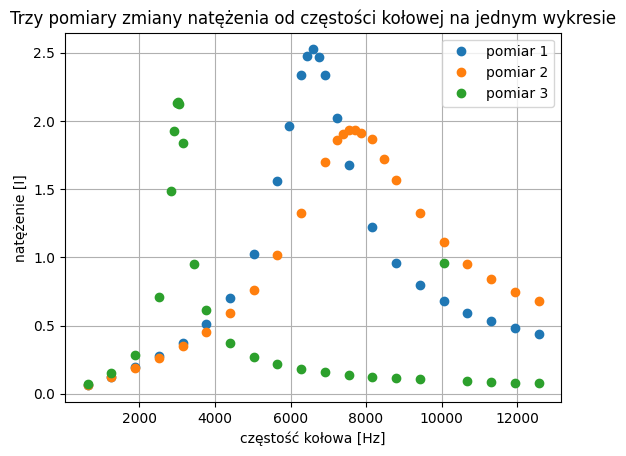

In [22]:
# Narysowanie wykresu z trzech pomiarów na raz
plot_from_multiple_dfs(
    title='Trzy pomiary zmiany natężenia od częstości kołowej na jednym wykresie',
    dfs=(mesurement_none, mesurement_copper, mesurement_steel),
    x_name='o', 
    y_name='i', 
    x_label='częstość kołowa [Hz]', 
    y_label='natężenie [I]'
)

### Komentarz

---

Jak widać na powyższym wykresie, częstość kołowa ma wpływ na natężenie prądu w układzie,  
przy czym jej wartość jest największa w miejscu częstości rezeonansowej.